In [51]:
import pandas as pd
from pandas_datareader.yahoo import daily as yh
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
ticker = 'RIO' #change ticker here
start_date = '2017-1-1' #change date here
itv = 'm' # m = month, d = day, w = week for interval.

price = pd.DataFrame()
price = yh.YahooDailyReader(ticker, start = start_date, interval = itv)
price = price.read()['Adj Close']
price.head()

Date
2017-01-01    27.882841
2017-02-01    25.847189
2017-03-01    26.033922
2017-04-01    25.483555
2017-05-01    25.797142
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

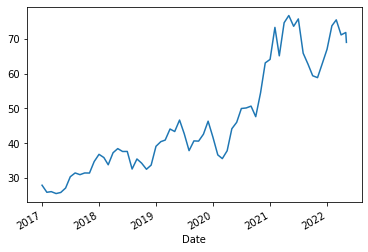

In [53]:
# uncomment the following code to out put the daily price.
# path_name = 'results/close_' + ticker + start_date +'.csv'
# price.to_csv(path_name)
price.plot()
# c = color, ls = linestyle, maker.

<AxesSubplot:xlabel='Date'>

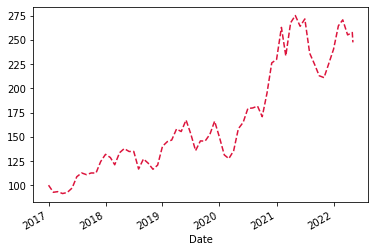

In [54]:
(price / price.iloc[0] * 100).plot(c = '#dc143c',ls='--') 

In [55]:
contribution = sum(price)
value = len(price) * price[-1]

ret = value/contribution - 1

print(f'If buying 1 share of {ticker} every month since {start_date}, the results are:')
print(f"Total contribution: ${contribution :.2f} ; Current value: ${value :.2f} ; Total return: {ret*100 :.2f}%")

If buying 1 share of RIO every month since 2017-1-1, the results are:
Total contribution: $3076.91 ; Current value: $4552.02 ; Total return: 47.94%


In [56]:
# dividend analysis

dividends = pd.DataFrame()

dividends = wb.DataReader(ticker,data_source = 'yahoo-dividends',start = start_date,) #use yahoo-actions see split.
dividends.head()

,action,value
2022-03-10,DIVIDEND,4.79
2021-08-12,DIVIDEND,5.61
2021-03-04,DIVIDEND,4.02
2020-08-06,DIVIDEND,1.55
2020-03-06,DIVIDEND,2.31


In [57]:
dividends.tail()

,action,value
2019-03-07,DIVIDEND,4.23
2018-08-09,DIVIDEND,1.271
2018-03-01,DIVIDEND,1.795
2017-08-09,DIVIDEND,1.1
2017-02-22,DIVIDEND,1.258


<AxesSubplot:>

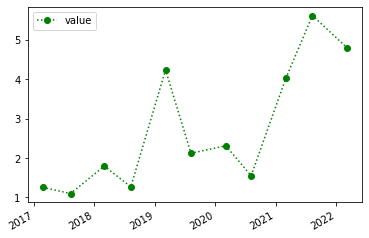

In [58]:
dividends.plot(c = 'g',marker='o', ls = ':') #ls or linestyle.

In [59]:
# calculate the most recent dividend yieldu
# dividend frequency, how many times a year.
freq_div = 2 # change frequency here

yd = dividends.iloc[0]['value'] / price.iloc[-1]
print(f'current yeild {yd * freq_div * 100 :.02f}%')

current yeild 13.89%
